In [3]:
import os
from src.preprocessing import audio_to_mel_spectrogram

# Define paths
data_dir = 'D:/MGC/data'
output_dir = 'D:/MGC/spectrograms'

# Loop through each genre folder
for genre in os.listdir(data_dir):
    genre_path = os.path.join(data_dir, genre)
    if not os.path.isdir(genre_path):
        continue  # skip if not a folder

    for file in os.listdir(genre_path):
        if file.endswith('.wav'):
            input_path = os.path.join(genre_path, file)
            output_path = os.path.join(output_dir, genre, file.replace('.wav', '.png'))

            # Create genre-specific output folder if it doesn't exist
            os.makedirs(os.path.dirname(output_path), exist_ok=True)

            try:
                audio_to_mel_spectrogram(input_path, output_path)
                print(f"✔️ Saved: {output_path}")
            except Exception as e:
                print(f"❌ Failed: {input_path} — {e}")

✔️ Saved: D:/MGC/spectrograms\classical\classical.00000.png
✔️ Saved: D:/MGC/spectrograms\classical\classical.00001.png
✔️ Saved: D:/MGC/spectrograms\classical\classical.00002.png
✔️ Saved: D:/MGC/spectrograms\classical\classical.00003.png
✔️ Saved: D:/MGC/spectrograms\classical\classical.00004.png
✔️ Saved: D:/MGC/spectrograms\classical\classical.00005.png
✔️ Saved: D:/MGC/spectrograms\classical\classical.00006.png
✔️ Saved: D:/MGC/spectrograms\classical\classical.00007.png
✔️ Saved: D:/MGC/spectrograms\classical\classical.00008.png
✔️ Saved: D:/MGC/spectrograms\classical\classical.00009.png
✔️ Saved: D:/MGC/spectrograms\classical\classical.00010.png
✔️ Saved: D:/MGC/spectrograms\classical\classical.00011.png
✔️ Saved: D:/MGC/spectrograms\classical\classical.00012.png
✔️ Saved: D:/MGC/spectrograms\classical\classical.00013.png
✔️ Saved: D:/MGC/spectrograms\classical\classical.00014.png
✔️ Saved: D:/MGC/spectrograms\classical\classical.00015.png
✔️ Saved: D:/MGC/spectrograms\classical\

d:\MGC\src\preprocessing.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=22050)
d:\MGC\env\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00056.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00057.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00058.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00059.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00060.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00061.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00062.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00063.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00064.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00065.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00066.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00067.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00068.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00069.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00070.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00071.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00072.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00073.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00074.png
✔️ Saved: D:/MGC/spectrograms\jazz\jazz.00075.png


In [3]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Path to the spectrograms
spectrogram_dir = 'D:/MGC/spectrograms'

data = []
labels = []

# Loop through each genre folder
for genre in os.listdir(spectrogram_dir):
    genre_path = os.path.join(spectrogram_dir, genre)
    if not os.path.isdir(genre_path):
        continue

    for file in os.listdir(genre_path):
        if file.endswith('.png'):
            file_path = os.path.join(genre_path, file)
            
            # Load image and resize (to ensure consistent size)
            img = Image.open(file_path).convert('RGB').resize((256, 256))
            img_array = np.array(img)
            data.append(img_array)
            labels.append(genre)

# Convert lists to arrays
X = np.array(data)
y = np.array(labels)

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Classes:", encoder.classes_)

X_train shape: (719, 256, 256, 3)
y_train shape: (719,)
Classes: ['classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop' 'reggae'
 'rock']


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

# Add more Conv layers for better feature extraction
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Adding one more Conv block
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


# Flatten and add Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation='softmax'))  # Output 9 genres

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


d:\MGC\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         9,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,680,169 (14.04 MB)

 Trainable params: 3,680,169 (14.04 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step - accuracy: 0.1087 - loss: 10.2331 - val_accuracy: 0.1667 - val_loss: 2.1567
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 281ms/step - accuracy: 0.2309 - loss: 2.0696 - val_accuracy: 0.2639 - val_loss: 1.9193
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 276ms/step - accuracy: 0.2792 - loss: 1.9054 - val_accuracy: 0.1875 - val_loss: 1.9820
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 290ms/step - accuracy: 0.3667 - loss: 1.7736 - val_accuracy: 0.2708 - val_loss: 1.8202
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 326ms/step - accuracy: 0.3695 - loss: 1.6347 - val_accuracy: 0.3611 - val_loss: 1.6966
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.4602 - loss: 1.4719 - val_accuracy: 0.3889 - val_loss: 1.7000
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.4574 - loss: 1.5449 - val_accuracy: 0.3542 - val_loss: 1.7006
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 298ms/step - accuracy: 0.4634 - loss: 1.4736 - val_accuracy: 0

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.8566 - loss: 0.4489 - val_accuracy: 0.5139 - val_loss: 1.6804
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - accuracy: 0.8275 - loss: 0.4834 - val_accuracy: 0.5208 - val_loss: 1.7170
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - accuracy: 0.9157 - loss: 0.2857 - val_accuracy: 0.5625 - val_loss: 1.7796
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - accuracy: 0.8669 - loss: 0.3378 - val_accuracy: 0.5625 - val_loss: 1.6171
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - accuracy: 0.9007 - loss: 0.2603 - val_accuracy: 0.5625 - val_loss: 1.7370
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - accuracy: 0.9502 - loss: 0.1700 - val_accuracy: 0.5764 - val_loss: 2.1282
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - accuracy: 0.9570 - loss: 0.1455 - val_accuracy: 0.5486 - val_loss: 2.4064
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 232ms/step - accuracy: 0.9578 - loss: 0.1510 - val_accuracy: 0.

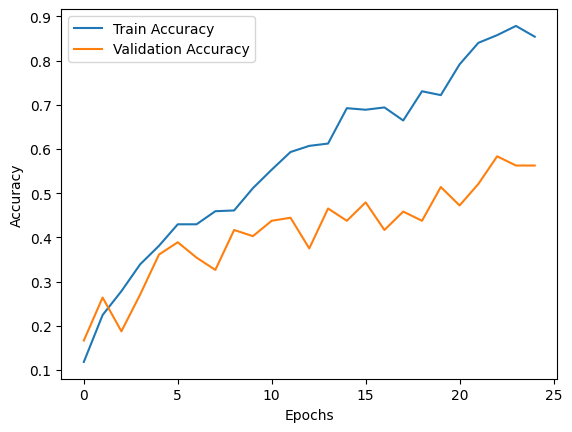

In [6]:
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5907 - loss: 1.5594
Test Accuracy: 60.00%


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
              precision    recall  f1-score   support

   classical       0.88      0.70      0.78        20
     country       0.67      0.20      0.31        20
       disco       0.50      0.75      0.60        20
      hiphop       0.55      0.80      0.65        20
        jazz       0.71      0.85      0.77        20
       metal       0.88      0.75      0.81        20
         pop       0.50      0.45      0.47        20
      reggae       0.65      0.55      0.59        20
        rock       0.30      0.35      0.33        20

    accuracy                           0.60       180
   macro avg       0.63      0.60      0.59       180
weighted avg       0.63      0.60      0.59       180



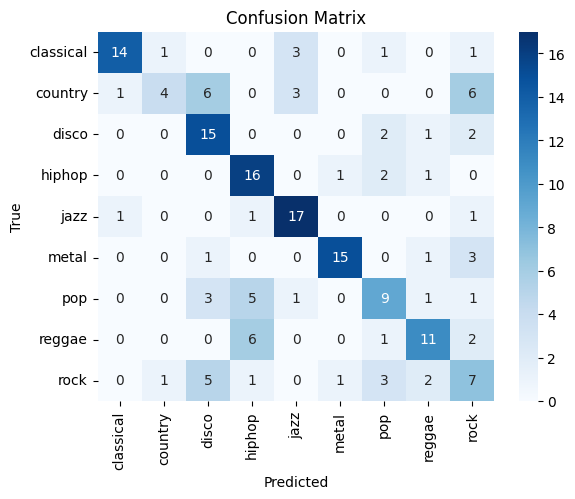

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print report
print(classification_report(y_test, y_pred_classes, target_names=encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [9]:
model.save('genre_classifier_model.h5')